<a href="https://colab.research.google.com/github/sanjay-k-biswas/eye-for-blind/blob/main/Eye_for_blind_workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

The World Health Organization (WHO) has reported that approximately 285 million people are visually impaired worldwide, and out of these 285 million, 39 million are completely blind. It gets extremely tough for them to carry out daily activities, one of which is reading. From reading a newspaper or a magazine to reading an important text message from your bank, it is tough for them to read the text written in it.

A similar problem they also face is seeing and enjoying the beauty of pictures and images. Today, in the world of social media, millions of images are uploaded daily. Some of them are about your friends and family, while some of them are about nature and its beauty. Understanding what is present in that image is quite a challenge for certain people who are suffering from visual impairment or who are blind.

---

**Problem Statement**

In this capstone project, you need to create a deep learning model which can explain the contents of an image in the form of speech through caption generation with an attention mechanism on Flickr8K dataset. This kind of model is a use-case for blind people so that they can understand any image with the help of speech. The caption generated through a CNN-RNN model will be converted to speech using a text to speech library. 

This problem statement is an application of both deep learning and natural language processing. The features of an image will be extracted by a CNN-based encoder and this will be decoded by an RNN model.

The project is an extended application of [Show, Attend and Tell: Neural Image Caption Generation with Visual Attention](https://arxiv.org/abs/1502.03044) paper.

 

The dataset is taken from the [Kaggle website](https://www.kaggle.com/adityajn105/flickr8k) and it consists of sentence-based image descriptions having a list of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events of the image.

In [69]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import keras
import glob
import os
from skimage import io
import random as rn 
rn.seed(42)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.preprocessing.image import load_img, img_to_array

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import string
import json
from tqdm import tqdm
import time

from PIL import Image

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s 'Flickr 8k'

ref                                                         title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
adityajn105/flickr8k                                        Flickr 8k Dataset                                 1GB  2020-04-27 07:27:19          26859        197  0.75             
kunalgupta2616/flickr-8k-images-with-captions               Flickr 8K Images with Captions                    1GB  2020-09-12 13:44:07           1612         10  0.9375           
gazu468/flickr-8k-images                                    Flickr 8k Dataset                                 1GB  2021-10-23 12:54:09             18          9  0.5625           
dibyansudiptiman/flickr-8k                                  Flickr8k Image Dataset                  

In [4]:
!kaggle datasets download -d adityajn105/flickr8k -p /content/kaggle/

100% 1.03G/1.04G [00:46<00:00, 25.1MB/s]
100% 1.04G/1.04G [00:46<00:00, 23.9MB/s]


In [5]:
!unzip /content/kaggle/flickr8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: Images/2844846111_8c1cbfc75d.jpg  
  inflating: Images/2844963839_ff09cdb81f.jpg  
  inflating: Images/2845246160_d0d1bbd6f0.jpg  
  inflating: Images/2845691057_d4ab89d889.jpg  
  inflating: Images/2845845721_d0bc113ff7.jpg  
  inflating: Images/2846037553_1a1de50709.jpg  
  inflating: Images/2846785268_904c5fcf9f.jpg  
  inflating: Images/2846843520_b0e6211478.jpg  
  inflating: Images/2847514745_9a35493023.jpg  
  inflating: Images/2847615962_c330bded6e.jpg  
  inflating: Images/2847859796_4d9cb0d31f.jpg  
  inflating: Images/2848266893_9693c66275.jpg  
  inflating: Images/2848571082_26454cb981.jpg  
  inflating: Images/2848895544_6d06210e9d.jpg  
  inflating: Images/2848977044_446a31d86e.jpg  
  inflating: Images/2849194983_2968c72832.jpg  
  inflating: Images/2850719435_221f15e951.jpg  
  inflating: Images/2851198725_37b6027625.jpg  
  inflating: Images/2851304910_b5721199bc.jpg  
  inflating: Images/2851931813_eaf8ed

In [6]:
!rm /content/kaggle/flickr8k.zip

Let's read the dataset

In [70]:
#Import the dataset and read the image into a separate variable
images='../content/Images/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [71]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    text_file_path = '../content/'

    text = pd.read_csv(text_file_path + filename)
    
    return text

image_captions_df = load_doc('captions.txt')

image_captions_df[:30]

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


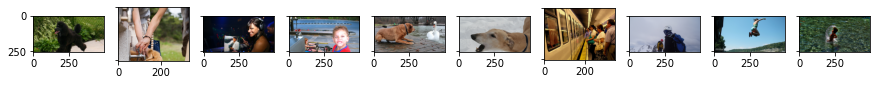

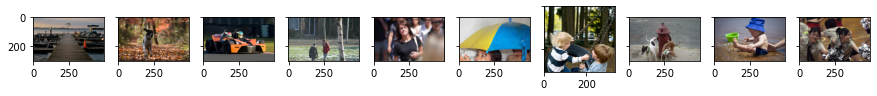

In [72]:
#Visualise both the images & text present in the dataset
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
   
    for ax,image in zip(axes, images):
        ax.imshow(io.imread(image), cmap)

#Plotting first 10 images 
plot_image(all_imgs[:10])

#Plotting last 10 images 
plot_image(all_imgs[8081:])

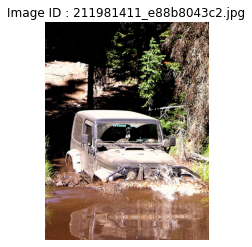

Image Shape :  (500, 375, 3) 

Captions for Image ID #  211981411_e88b8043c2.jpg  : 
['A hummer is driving through a mud puddle several feet deep .'
 'An old dusty car is half way in the brown water .'
 'An old jeep partially submerged in water' 'Dirty car in body of water'
 'The dirty vehicle is caught in a flood .'] 




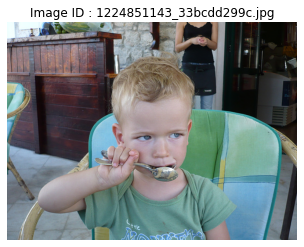

Image Shape :  (375, 500, 3) 

Captions for Image ID #  1224851143_33bcdd299c.jpg  : 
['A boy eats with a spoon .'
 'A little boy holds a spoon up to his mouth .'
 'A little boy is eating his food off of a spoon while sitting on a patio .'
 'A small child dressed in green is eating with a spoon .'
 'A young child holds a spoon to its mouth while sitting in a chair .'] 




In [73]:
#Visualising 2 random images & captions present in the dataset

for i in range(2) : 
    # image
    random_index = rn.randint(0,len(all_imgs))
    image_id = image_captions_df.loc[random_index,'image']
    image = plt.imread(images + image_id)
    plt.title('Image ID : ' +image_id )
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    print('Image Shape : ', image.shape,'\n')
    
    # captions
    condition = image_captions_df['image'] == image_id
    print('Captions for Image ID # ', image_id , ' : ')
    print(image_captions_df.loc[condition,'caption'].values, '\n\n')

In [74]:
print(image_captions_df.shape)
print(image_captions_df.nunique())

(40455, 2)
image       8091
caption    40201
dtype: int64


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [75]:
all_img_id=image_captions_df['image'].values #store all the image id here
all_img_vector=(images + '/'+ image_captions_df['image']).values #store all the image path here
annotations=image_captions_df['caption'].values #store all the captions here

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
pd.set_option('max_colwidth', 100)
print('No of samples = ', df.shape[0])

df.head(10)

No of samples =  40455


,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,../content/Images//1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,../content/Images//1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,../content/Images//1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,../content/Images//1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,../content/Images//1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
5,1001773457_577c3a7d70.jpg,../content/Images//1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,../content/Images//1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
7,1001773457_577c3a7d70.jpg,../content/Images//1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
8,1001773457_577c3a7d70.jpg,../content/Images//1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
9,1001773457_577c3a7d70.jpg,../content/Images//1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [76]:
#Create a list which contains all the captions
#add the <start> & <end> token to all those captions as well
annotations = (df['Captions'].apply(lambda x : '<start> '+ x + ' <end>')).values

#Create a list which contains all the path to the images
all_img_path = df['Path'].values

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))
print("Unique images present in the dataset: " + str(len(set(all_img_path))))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455
Unique images present in the dataset: 8091


In [77]:
#Create the vocabulary & the counter for the captions

# Removing all punctuations from captions 
df['Captions'] = df['Captions'].apply(lambda x : ''.join(l for l in x if l not in string.punctuation))

vocabulary = [y.lower() for x in df['Captions'].values for y in x.split()] 

val_count=Counter(vocabulary)
val_count

Counter({'a': 62986,
         'child': 1545,
         'in': 18974,
         'pink': 735,
         'dress': 348,
         'is': 9345,
         'climbing': 502,
         'up': 1260,
         'set': 108,
         'of': 6713,
         'stairs': 109,
         'an': 2432,
         'entry': 1,
         'way': 50,
         'girl': 3328,
         'going': 149,
         'into': 1074,
         'wooden': 284,
         'building': 510,
         'little': 1768,
         'playhouse': 6,
         'the': 18418,
         'to': 3173,
         'her': 1178,
         'cabin': 4,
         'black': 3832,
         'dog': 8136,
         'and': 8851,
         'spotted': 37,
         'are': 3504,
         'fighting': 132,
         'tricolored': 14,
         'playing': 2008,
         'with': 7765,
         'each': 430,
         'other': 773,
         'on': 10743,
         'road': 388,
         'white': 3940,
         'brown': 2563,
         'spots': 29,
         'staring': 57,
         'at': 2914,
         'street

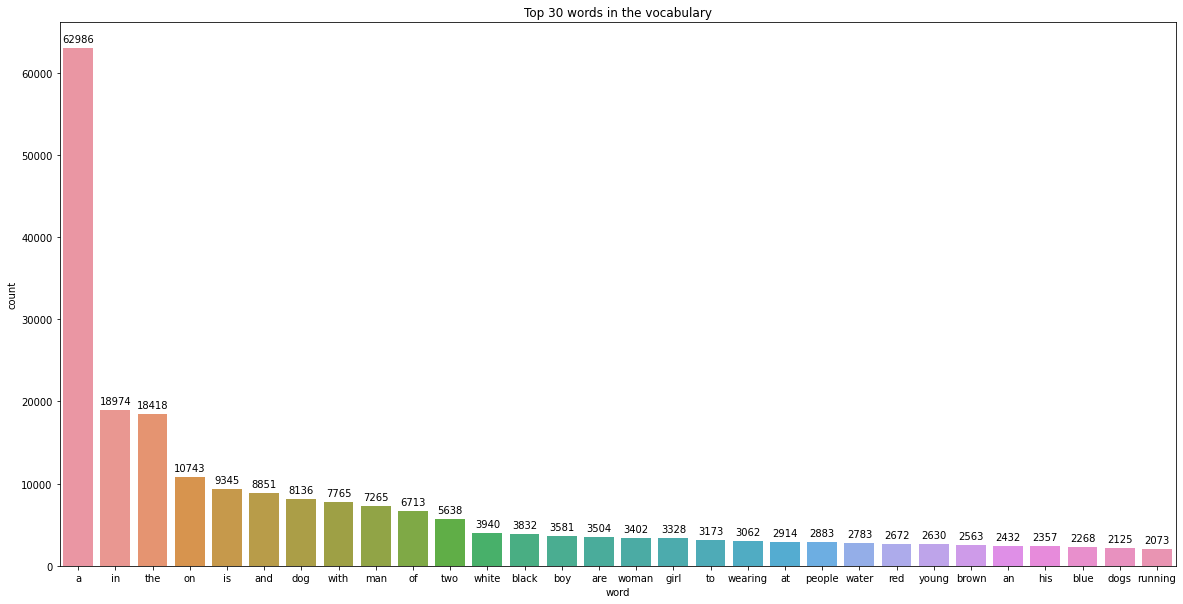

In [78]:
#Visualise the top 30 occuring words in the captions
top30 = val_count.most_common(30)

words = []
counts = []
for word_count in top30 : 
    words.append(word_count[0])
    counts.append(word_count[1])

plt.figure(figsize=(20,10))
plt.title('Top 30 words in the vocabulary')
plt.xlabel('word')
plt.ylabel('count')
plot = sns.barplot(x=words, y=counts)
for p in plot.patches:
    plot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

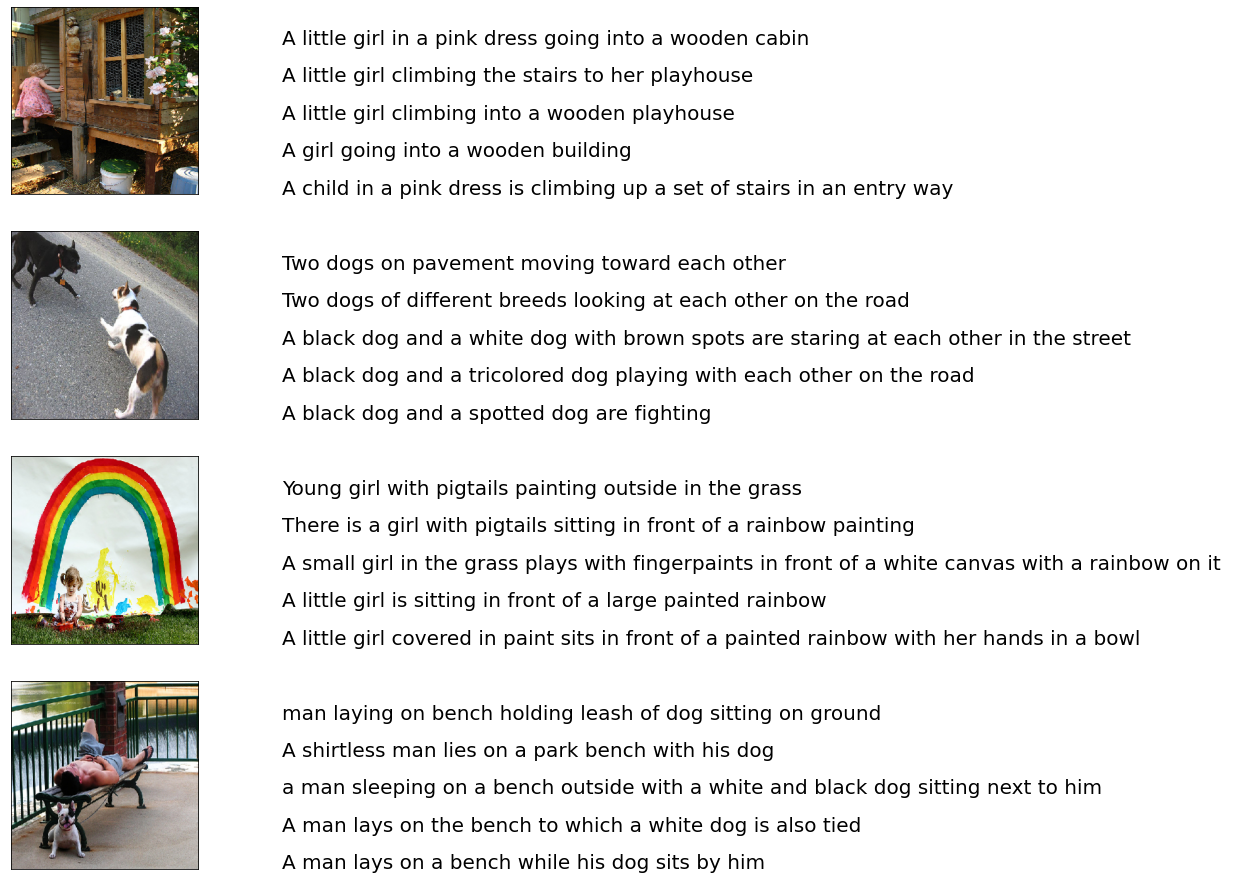

In [79]:
def plot_image_captions(Pathlist,captionsList,fig,count=2,npix=299,nimg=2):
        image_load = load_img(Path,target_size=(npix,npix,3))
        ax = fig.add_subplot(nimg,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        
        count +=1
        ax = fig.add_subplot(nimg,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)

fig = plt.figure(figsize=(10,20))
count = 1
    
for Path in df[:20].Path.unique():
    captions = list(df["Captions"].loc[df.Path== Path].values)
    plot_image_captions(Path,captions,fig,count,299,5)
    count +=2
plt.show()

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [80]:
# create the tokenizer

tokenizer = keras.preprocessing.text.Tokenizer(
num_words = 5000, 
filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
lower = True, 
split = " ", 
char_level = False, 
oov_token = '<unk>',)

# fitting the tokenizer on words in the dataset
tokenizer.fit_on_texts(annotations)

# Converting sentences to sequences of word token indexes
caption_sequences = tokenizer.texts_to_sequences(annotations)
caption_sequences[:10]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4],
 [3, 2, 16, 10, 9, 2, 844, 10, 18, 344, 4],
 [3, 2, 16, 10, 9, 2, 1576, 236, 10, 35, 11, 138, 83, 7, 6, 152, 4],
 [3, 2, 16, 10, 9, 2, 15, 10, 11, 28, 1002, 18, 641, 23, 138, 83, 5, 6, 73, 4],
 [3, 14, 32, 13, 742, 2654, 90, 23, 138, 83, 7, 6, 152, 4],
 [3, 14, 32, 7, 728, 806, 322, 138, 83, 4]]

In [81]:
# Create word-to-index and index-to-word mappings.
word2index = json.loads(tokenizer.get_config()['word_index'])
index2word = json.loads(tokenizer.get_config()['index_word'])

index2word = {int(key) : value for key,value in index2word.items()}

print('Index for the word ',"<start> is", word2index["<start>"])
print('Word for the index : 3 is ', index2word[3])

Index for the word  <start> is 3
Word for the index : 3 is  <start>


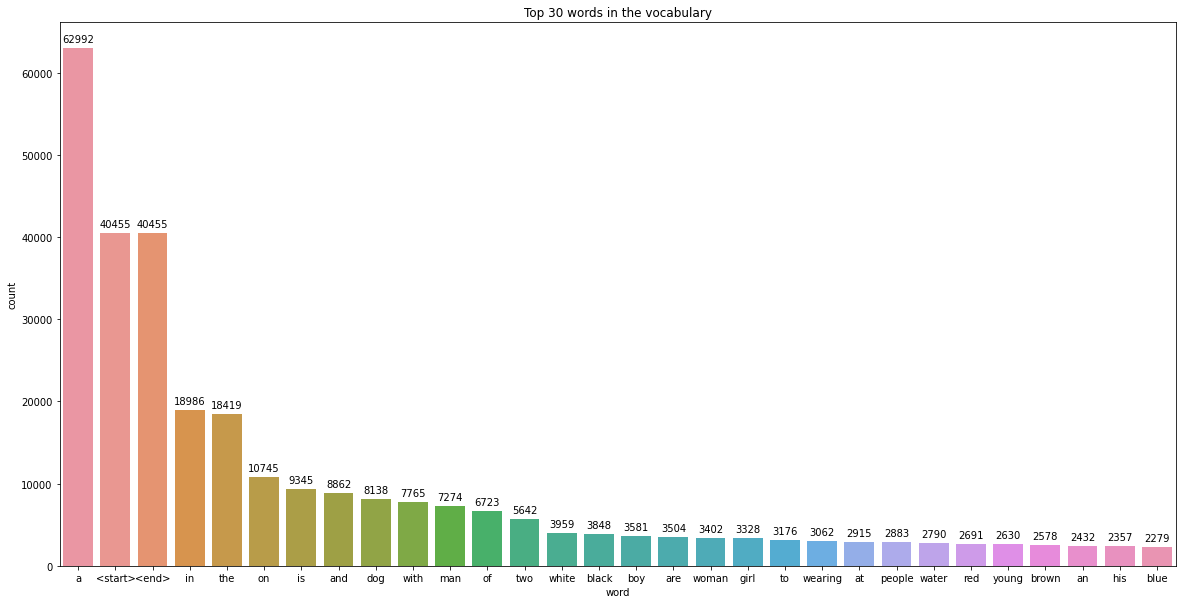

In [82]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
word_counts = tokenizer.get_config()['word_counts']

word_counts_df = pd.DataFrame.from_dict(data = json.loads(word_counts), orient='index', columns=['count'])
top_30 = word_counts_df.sort_values(by='count', ascending=False)[:30]


plt.figure(figsize=(20,10))
plt.title('Top 30 words in the vocabulary')
plt.xlabel('word')
plt.ylabel('count')
plot = sns.barplot(x=top_30.index , y=top_30['count'])
for p in plot.patches:
    plot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

In [83]:
# Pad each vector to the max_length of the captions ^ store it to a vairable
max_length = max([len(caption_sequence) for caption_sequence in caption_sequences])
print('Max Length of Caption :', max_length)

# padding all caption sequences.
cap_vector =  tf.keras.preprocessing.sequence.pad_sequences(
    caption_sequences, padding="post"
)

print("The shape of Caption vector is :" + str(cap_vector.shape))

Max Length of Caption : 39
The shape of Caption vector is :(40455, 39)


In [84]:
# Adding padding index to tokenizer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

In [85]:
!mkdir Features # Creating a folder to store features 

with tf.device('/GPU:0'):
    
    # Inceptionv3 Model with ImageNet weights
    def load_inception_model() : 
        image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')
        new_input = image_model.input #  input of the image_model
        hidden_layer =  image_model.layers[-1].output #  output of the image_model
        return tf.keras.Model(inputs=new_input, outputs=hidden_layer) # final model using both input & output layer
         

    image_features_extract_model = load_inception_model()

    def extract_features_and_cache(path) : 
        
        # Reading Image 
        image = tf.io.read_file(bytes.decode(path.numpy()))
        image = tf.image.decode_jpeg(image)
        image = tf.image.convert_image_dtype(image, tf.float32)

        # Resizing the Image for Inceptionv3
        image = tf.image.resize(image, [299, 299])

        # Preprocessing for Inceptionv3
        preprocessed_for_inception = tf.keras.applications.inception_v3.preprocess_input(image) # normalization (-1,1)
        preprocessed_for_inception = tf.expand_dims(preprocessed_for_inception, 0)

        # Extracting Image Features 
        
        features = image_features_extract_model(preprocessed_for_inception)
        extracted_features = tf.reshape(features, (-1, tf.shape(features)[-1]))

        # Caching Image Features 
        image_name = (bytes.decode(path.numpy())).split('/')[-1]
        feature_path =  './Features/' + image_name.split('.')[0] + '_features_.npy'
        np.save(feature_path, extracted_features)

        return feature_path
    
    
# Creating an tf.dataset with unique images in the dataset

unique_images = list(set(all_img_path)) 
image_dataset = tf.data.Dataset.from_tensor_slices(unique_images)

# Running feature extraction and caching
for path in tqdm(image_dataset) : 
        extract_features_and_cache(path)

mkdir: cannot create directory ‘Features’: File exists


100%|██████████| 8091/8091 [14:17<00:00,  9.43it/s]


In [86]:
# Checking if features of all images are extracted
assert len(glob.glob('./Features/*')) == len(set(all_img_path))

In [87]:
# Function to load cached extracted features from disk
def load_features(path) : 
    image_name = (bytes.decode(path.numpy())).split('/')[-1]
    feature_path =  './Features/' + image_name.split('.')[0] + '_features_.npy'
    features = np.load(feature_path)
    features = tf.reshape(features, (-1, tf.shape(features)[-1]))
    return features

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [88]:
BATCH_SIZE = 256
BUFFER_SIZE = 1024
dataset_size = all_img_path.shape[0]
train_size = int(0.8 * dataset_size)


train_img_paths, train_cap_vector = all_img_path[:train_size], cap_vector[:train_size][:]
test_img_paths, test_cap_vector = all_img_path[train_size : ], cap_vector[train_size :][:]

train_dataset = tf.data.Dataset.from_tensor_slices((train_img_paths, train_cap_vector))
train_dataset = train_dataset.shuffle(BUFFER_SIZE, seed=42, reshuffle_each_iteration=True)

## Replacing images with features extracted from Inception net V3
train_dataset = train_dataset.map(lambda path, caption : (tf.py_function(load_features, [path],tf.float32),caption), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE, drop_remainder=True)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img_paths, test_cap_vector))

## Replacing images with features extracted from Inception net V3
test_dataset = test_dataset.map(lambda path, caption : (tf.py_function(load_features, [path],tf.float32),caption), num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE, drop_remainder=True)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

train_dataset.cache('./train')
test_dataset.cache('./test')

<CacheDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(256, 39), dtype=tf.int32, name=None))>

[   3   14   32  854   21  405    6 3630   52   26  178   76    6   83
    4    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]
['<start>', 'two', 'dogs', 'try', 'to', 'get', 'the', 'chewed', 'up', 'red', 'frisbee', 'from', 'the', 'other', '<end>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


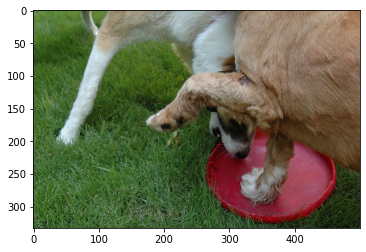

In [89]:
# image, caption check 
index = 6010
path = test_img_paths[index]
image = plt.imread(path)
plt.imshow(image)

print(test_cap_vector[index])
print([tokenizer.index_word[id] for id in test_cap_vector[index]])

In [90]:
# Features and Caption shapes check 

sample_img_feature_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_feature_batch.shape) #(batch_size, 64, 2048)
print(sample_cap_batch.shape) #(batch_size, max_len)

(256, 64, 2048)
(256, 39)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [91]:
embedding_dim = 256 
units = 512
vocab_size = 5001 #top 5,000 words +1 ( <unk>)
train_num_steps = train_size // BATCH_SIZE
test_num_steps = (dataset_size - train_size) // BATCH_SIZE

print('number of training steps : ', train_num_steps)
print('number of test steps : ', test_num_steps)

number of training steps :  126
number of test steps :  31


### Encoder

In [92]:
Model = tf.keras.Model
class Encoder(Model):
    def __init__(self,embed_dim=embedding_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim , activation='relu') #building Dense layer with relu activation

    def call(self, x):
        features =  self.dense(x) # extracting the features from the image shape: shape : (batch, 8*8, embed_dim)
        return features

### Attention model

In [93]:
class Attention_model(Model):
  def __init__(self, units):
      super(Attention_model, self).__init__()
      self.units=units
      self.W1 = tf.keras.layers.Dense(self.units)#Dense layer
      self.W2 = tf.keras.layers.Dense(self.units) #Dense layer
      self.V = tf.keras.layers.Dense(1) #Final Dense layer with unit 1


  def call(self, features, hidden):
    hidden_with_time_axis =  tf.expand_dims(hidden,1) # Expanding the hidden shape to shape: (batch_size, 1, hidden_size)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))) # attention_hidden_layer.shape = (BATCH_SIZE, 64, units)
    score = self.V(attention_hidden_layer)
    attention_weights =  tf.nn.softmax(score, axis=1)# extracting attention weights with shape: (batch_size, 8*8, 1)
    context_vector =  attention_weights * features #Creating context vector with shape (batch_size, 8*8,embedding_dim)
    context_vector = tf.reduce_sum(context_vector, axis=1) # reducing the shape to (batch_size, embedding_dim)
    
    return context_vector, attention_weights

### Decoder

In [94]:
class Decoder(Model):
  def __init__(self, embed_dim, units, vocab_size):
    super(Decoder, self).__init__()
    self.units=units
    self.attention = Attention_model(self.units) #iniitalizing Attention model with units
    self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #building an Embedding layer
    self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform') # RNN 
    self.d1 = tf.keras.layers.Dense(self.units) #Dense layer
    self.d2 = tf.keras.layers.Dense(vocab_size) #Dense layer


  def call(self,x,features, hidden):
    context_vector, attention_weights = self.attention(features,hidden) #creating context vector & attention weights from attention model
    x =  self.embed(x) # embedding input to shape: (batch_size, 1, embedding_dim)
    x =  tf.concat([tf.expand_dims(context_vector,axis=1) ,x], axis=-1)# Concatenating input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)

    output,state = self.gru(x) # Extracting the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)

    x = self.d1(output)

    x = tf.reshape(x, (-1, x.shape[2])) # shape : (batch_size * max_length, hidden_size)

    x = self.d2(x) # shape : (batch_size * max_length, vocab_size)

    return x, state, attention_weights

  def init_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [95]:
# Encoder and Decoder Object instantiation
encoder = Encoder(embedding_dim)
decoder=Decoder(embedding_dim, units, vocab_size)

In [96]:
# Encoder and decoder output shapes check 

features=encoder(sample_img_feature_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)
predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)

print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (256, 64, 256)
Predcitions shape from Decoder: (256, 5001)
Attention weights shape from Decoder: (256, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [97]:
# Optimiser and loss object
 
optimizer = tf.keras.optimizers.Adam() #defining the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #defining loss object

In [98]:
# Custom loss function 
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0)) # masking padding sequences
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype) 
    loss_ *= mask

    return tf.reduce_mean(loss_) # average loss across batch

In [99]:
# Check point manager 

checkpoint_path = "./checkpoints/train_dataset/"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [100]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1]) # retrieve last epoch from saved checkpoints
    ckpt.restore(ckpt_manager.latest_checkpoint)

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [101]:
# Custom Train Step  
@tf.function
def train_step(img_tensor, target) : 

    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)


    with tf.GradientTape() as tape:
        #training steps
        
        # Encoder
        features=encoder(img_tensor,training =True)
        
        # Decoder
        for i in range(1,target.shape[1]) : 
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:,i], predictions)
            dec_input = tf.expand_dims(target[:,i],1)
    
    # backpropagation
    avg_loss = (loss / int(target.shape[1]))
    trainable_variables = encoder.trainable_weights + decoder.trainable_weights
    
    gradients = tape.gradient(loss,trainable_variables)
    optimizer.apply_gradients(zip(gradients,trainable_variables))

    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [102]:
# Custom Test Step 

@tf.function
def test_step(img_tensor, target):
    loss = 0

    #testing steps
    
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    features=encoder(img_tensor)

    for i in range(1,target.shape[1]) : 
        predictions, hidden, _ = decoder(dec_input, features, hidden)
        loss += loss_function(target[:,i], predictions)
        predicted_id = tf.argmax(predictions[0])
        dec_input = tf.expand_dims([predicted_id] * target.shape[0] , 1)



    avg_loss = (loss / int(target.shape[1]))

    return loss, avg_loss

In [103]:
def test_loss_cal(test_dataset):
  total_loss = 0 
  #write your code to get the average loss result on your test data
  for img_tensor, target in test_dataset : 
    batch_loss , t_loss = test_step(img_tensor, target)
    total_loss += t_loss
  avg_test_loss = total_loss/int(target.shape[1])
  return avg_test_loss

In [104]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100

with tf.device('/GPU:0'):
    for epoch in range(start_epoch, EPOCHS):
        print('EPOCH :',epoch+1,' of ', EPOCHS)
        start = time.time()
        total_loss = 0

        for (batch, (img_tensor, target)) in enumerate(tqdm(train_dataset)):

            batch_loss, t_loss = train_step(img_tensor, target)
            total_loss += t_loss
            avg_train_loss=total_loss / train_num_steps

        loss_plot.append(avg_train_loss)    
        test_loss = test_loss_cal(test_dataset)
        test_loss_plot.append(test_loss)

        print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
        print ('Time taken for 1 epoch {:.3f} sec\n'.format(time.time() - start))

        if test_loss < best_test_loss:
            print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
            best_test_loss = test_loss
            ckpt_manager.save()

EPOCH : 1  of  15


100%|██████████| 126/126 [02:15<00:00,  1.07s/it]


For epoch: 1, the train loss is 1.508, & test loss is 1.634
Time taken for 1 epoch 171.238 sec

Test loss has been reduced from 100.000 to 1.634
EPOCH : 2  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 2, the train loss is 1.184, & test loss is 1.717
Time taken for 1 epoch 106.560 sec

EPOCH : 3  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 3, the train loss is 1.098, & test loss is 1.699
Time taken for 1 epoch 106.478 sec

EPOCH : 4  of  15


100%|██████████| 126/126 [01:25<00:00,  1.47it/s]


For epoch: 4, the train loss is 1.047, & test loss is 1.748
Time taken for 1 epoch 106.705 sec

EPOCH : 5  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 5, the train loss is 1.011, & test loss is 1.712
Time taken for 1 epoch 106.251 sec

EPOCH : 6  of  15


100%|██████████| 126/126 [01:24<00:00,  1.49it/s]


For epoch: 6, the train loss is 0.984, & test loss is 1.737
Time taken for 1 epoch 106.049 sec

EPOCH : 7  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 7, the train loss is 0.960, & test loss is 1.742
Time taken for 1 epoch 106.168 sec

EPOCH : 8  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 8, the train loss is 0.939, & test loss is 1.758
Time taken for 1 epoch 106.341 sec

EPOCH : 9  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 9, the train loss is 0.920, & test loss is 1.815
Time taken for 1 epoch 106.574 sec

EPOCH : 10  of  15


100%|██████████| 126/126 [01:25<00:00,  1.48it/s]


For epoch: 10, the train loss is 0.903, & test loss is 1.851
Time taken for 1 epoch 106.107 sec

EPOCH : 11  of  15


100%|██████████| 126/126 [01:24<00:00,  1.49it/s]


For epoch: 11, the train loss is 0.887, & test loss is 1.857
Time taken for 1 epoch 105.709 sec

EPOCH : 12  of  15


100%|██████████| 126/126 [01:25<00:00,  1.47it/s]


For epoch: 12, the train loss is 0.872, & test loss is 1.877
Time taken for 1 epoch 106.841 sec

EPOCH : 13  of  15


100%|██████████| 126/126 [01:24<00:00,  1.50it/s]


For epoch: 13, the train loss is 0.858, & test loss is 1.921
Time taken for 1 epoch 105.323 sec

EPOCH : 14  of  15


100%|██████████| 126/126 [01:24<00:00,  1.49it/s]


For epoch: 14, the train loss is 0.844, & test loss is 1.909
Time taken for 1 epoch 105.743 sec

EPOCH : 15  of  15


100%|██████████| 126/126 [01:24<00:00,  1.49it/s]


For epoch: 15, the train loss is 0.830, & test loss is 1.946
Time taken for 1 epoch 106.169 sec



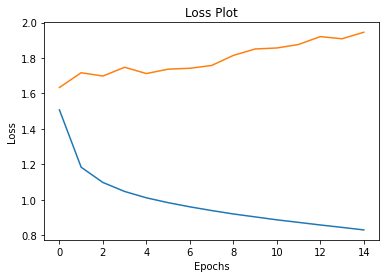

In [105]:
# Loss plot
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [106]:
# Model evaulation using greedy search
def evaluate(path):
    # attention_plot = np.zeros((max_length, attention_features_shape=64))
    attention_plot = np.zeros((max_length,64))
    hidden = decoder.init_state(batch_size=1)

     # Reading Image 
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resizing the Image for Inceptionv3
    image = tf.image.resize(image, [299, 299])

    # Preprocessing for Inceptionv3
    preprocessed_for_inception = tf.keras.applications.inception_v3.preprocess_input(image) # normalization (-1,1)
    preprocessed_for_inception = tf.expand_dims(preprocessed_for_inception, 0)

    # Extracting Image Features 

    features = image_features_extract_model(preprocessed_for_inception)
    extracted_features = tf.reshape(features, (features.shape[0], -1, features.shape[3]))
        

    features = encoder(extracted_features) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder
        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        
        result.append(tokenizer.index_word[predicted_id])
    

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

### Beam Search(optional)

In [107]:
def beam_evaluate(image, beam_index = 3 ):#your value for beam index

    #write your code to evaluate the result using beam search
    start = [tokenizer.word_index["<start>"]]
    # result [i][0] : word index of the ith word in result
    # result [i][1] : probability of ith word being predicted
    result = [[start, 0.0]]
    attention_plot = np.zeros((max_length,attention_features_shape))  
    hidden = decoder.init_state(batch_size=1)
    features,dec_input = init_features(image)
    
    
    while len(result[0][0]) < max_length:
        i = 0 
        temp = []
        for s in result:
            preds, hidden, attention_weights = decoder(dec_input,features,hidden)
            attention_plot = tf.reshape(attention_w,(-1,)).numpy()
            i +=1
            # Getting the top <beam_index>(n) predictions and creating a 
            word_preds = np.argsort(preds[0])[-beam_index:]
            
            
            # new list  to put in the model again
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])
                    
        result = temp
        # Sorting according to the probabilities
        result = sorted(start_word, reverse=False, key=lambda l: l[1])
        # Getting the top words
        result = result[-beam_index:]
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        pred_id = pred_list[-1]       
        if(pred_id ==3):
            break            
                  
        dec_input = tf.expand_dims([pred_id],0)
    
    result = result[-1][0]
    intermediate_caption = [tokenizer.index_word[i] for i in start_word]

    final_caption = []
    
    for i in intermediate_caption:
        if i == '<end>':
            break
        final_caption.append(i)
        
    attention_plot = attention_plot[:len(result),:]
    final_caption = ' '.join(final_caption[1:])
    return final_caption,attention_plot

In [108]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [109]:
from nltk.translate.bleu_score import sentence_bleu

In [110]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

BLEU score: 6.374943338305425e-307
Real Caption: a man dressed and a black shirt and pants is high jumping over a red and black pole
Prediction Caption: a group of people in a heavy crowd


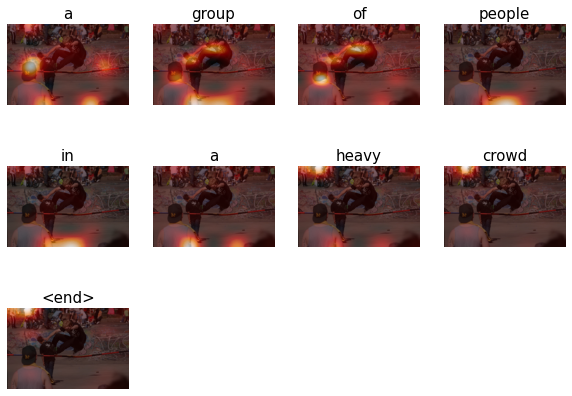

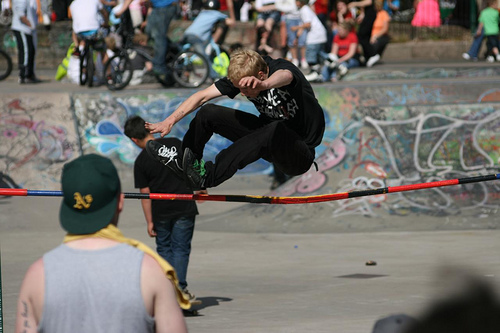

In [115]:
# Greedy Search Evaluation on a test image , caption

test_img_paths, test_cap_vector
rid = np.random.randint(0, len(test_img_paths))
test_image = test_img_paths[rid]

real_caption = test_cap_vector[rid]


real_caption = ' '.join([tokenizer.index_word[i] for i in test_cap_vector[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0,0,1,0))
print(f"BLEU score: {score*100}")
print('Real Caption:', real_caption)
print('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


Image.open(test_image)

**Covert text to audio**

In [135]:
!pip install gTTs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 14.3 MB/s eta 0:00:00
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
flask 1.1.4 requires click<8.0,>=5.1, but you have c

In [136]:
from gtts import gTTS
from IPython import display 

In [137]:
audio_file = 'pred_caption.mp3'
tts = gTTS(pred_caption, slow=False)
tts.save(audio_file)
display.display(display.Audio(audio_file))